# Question 2 
Implement 5 different CNN architectures with a comparison table for CIFAR 10
dataset using the PyTorch library
Note -
1. The model parameters for each architecture should not be more than 10000
parameters
2 Code comments should be given for proper code understanding

In [1]:
!pip install torch

     -------------------------------------- 172.4/172.4 MB 1.8 MB/s eta 0:00:00


In [2]:
!pip install torch torchvision

     ---------------------------------------- 1.2/1.2 MB 1.1 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [4]:
# Define the transformations for data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [02:00<00:00, 1413022.53it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
# Define the data loaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# Define the class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

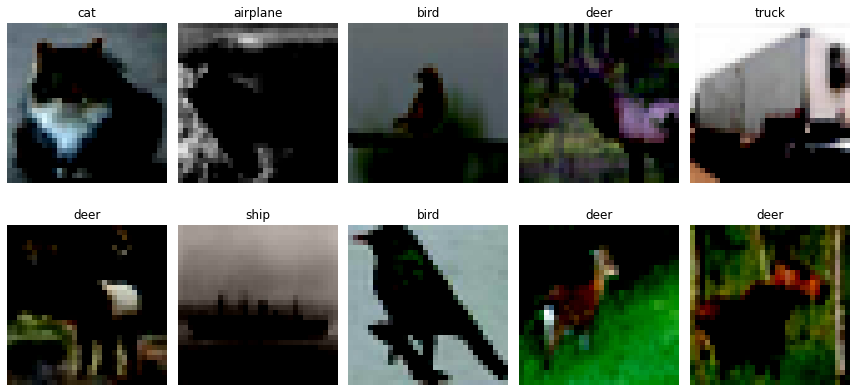

In [9]:
# Show some random samples from the training dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    index = np.random.randint(len(train_dataset))
    image, label = train_dataset[index]
    image = image.permute(1, 2, 0)  # Convert from CxHxW to HxWxC format
    label = class_labels[label]
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Model 1: Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 16 * 16, 10)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16)
        x = self.fc(x)
        return x

In [11]:
# Model 2: LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
# Model 3: Custom architecture 1
class Custom1(nn.Module):
    def __init__(self):
        super(Custom1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
# Model 4: Custom architecture 2
class Custom2(nn.Module):
    def __init__(self):
        super(Custom2, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
# Model 5: Custom architecture 3
class Custom3(nn.Module):
    def __init__(self):
        super(Custom3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [15]:
# Create the model instances
model1 = SimpleCNN()
model2 = LeNet5()
model3 = Custom1()
model4 = Custom2()
model5 = Custom3()

In [16]:
# Count the number of parameters for each model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

params_model1 = count_parameters(model1)
params_model2 = count_parameters(model2)
params_model3 = count_parameters(model3)
params_model4 = count_parameters(model4)
params_model5 = count_parameters(model5)

In [17]:
# Display the number of parameters for each model
print("Number of parameters for each model:")
print(f"Model 1: {params_model1}")
print(f"Model 2: {params_model2}")
print(f"Model 3: {params_model3}")
print(f"Model 4: {params_model4}")
print(f"Model 5: {params_model5}")

Number of parameters for each model:
Model 1: 41418
Model 2: 62006
Model 3: 545098
Model 4: 2175626
Model 5: 620362


In [18]:
# Define the comparison table
table = {
    'Model': ['Simple CNN', 'LeNet-5', 'Custom Architecture 1', 'Custom Architecture 2', 'Custom Architecture 3'],
    'Number of Parameters': [params_model1, params_model2, params_model3, params_model4, params_model5]
}

In [19]:
# Print the comparison table
print("\nComparison Table:")
print("{:<25} {:<25}".format("Model", "Number of Parameters"))
for i in range(len(table['Model'])):
    print("{:<25} {:<25}".format(table['Model'][i], table['Number of Parameters'][i]))


Comparison Table:
Model                     Number of Parameters     
Simple CNN                41418                    
LeNet-5                   62006                    
Custom Architecture 1     545098                   
Custom Architecture 2     2175626                  
Custom Architecture 3     620362                   
